### Multiple Linear Regression

<p>Assumptions of Simple Linear Regression</p>
<li>Non linear relationship between X and Y</li>
<li>Non Homoscedasticity or unequal variance</li>
<li>Uneven Multivariate Normality - Normality of Error Distribution</li>
<li>Independence - No correlation</li>
<li>Lack of Multicolinearity - Predictors are not co-related with one another</li>
<li>The Outliner check - This is not an assumption but extra</li>

<p>5 methods of building a model</p>
<li>All-in</li>
<li>Backward Elimination</li>
<li>Forward Selection</li>
<li>Bidirectional Selection</li>
<li>Score Comparision</li>

In [68]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Import the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X,y

(array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California'],
        [130298.13, 145530.06, 323876.68, 'Florida'],
        [120542.52, 148718.95, 311613.29, 'New York'],
        [123334.88, 108679.17, 304981.62, 'California'],
        [101913.08, 110594.11, 229160.95, 'Florida'],
        [100671.96, 91790.61, 249744.55, 'California'],
        [93863.75, 127320.38, 249839.44, 'Florida'],
        [91992.39, 135495.07, 252664.93, 'California'],
        [119943.24, 156547.42, 256512.92, 'Florida'],
        [114523.61, 122616.84, 261776.23, 'New York'],
        [78013.11, 121597.55, 264346.06, 'California'],
        [94657.16, 145077.58, 282574.31, 'New York'],
        [91749.1

In [70]:
# Encoding the categorical data
# Encode the independent variable
# Also just return the values of encoded categorical data along with the actual data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [71]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
# Training the multiple linear regression model on the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


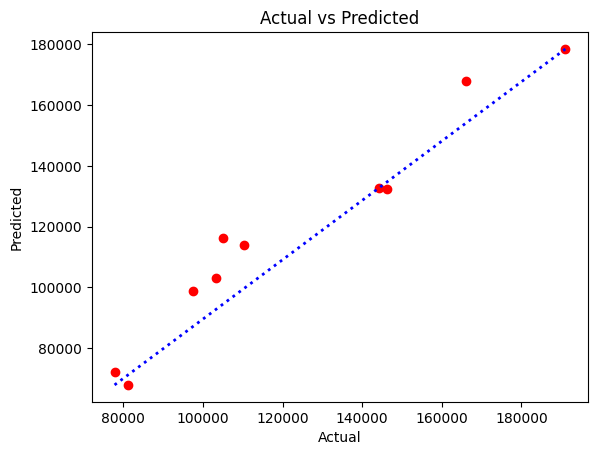

In [74]:
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='blue', linewidth=2, linestyle='dotted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [75]:
# Predict the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


In [76]:
# Getting the final linear regression equation with the values of the coefficients
print(regressor.coef_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]


In [77]:
# Getting the final linear regression equation with the values of the intercept
print(regressor.intercept_)

42467.52924853325


In [78]:
# R-Squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.93470684732822

In [79]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

83502864.0326062

In [80]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

7514.293659643178